In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# function fit
from scipy.optimize import curve_fit

# disable warnings
import warnings
warnings.filterwarnings('ignore')

# save output
import os
import csv

### Chapman-Richards Growth Function

In [14]:
def growth_curve(age, A, k, p):
    return A * (1 - np.exp(-k * age))**p

In [32]:
class TreeSpecies:
    def __init__(self, name, age, biomass, initial_guesses):
        self.name = name
        self.age = np.array(age)
        self.biomass = np.array(biomass)
        self.initial_guesses = initial_guesses
        self.params, _ = curve_fit(growth_curve, self.age, self.biomass, self.initial_guesses)
        self.plot()

    def plot(self):
        plt.scatter(self.age, self.biomass, label='data', marker='x', c='r')
        x = np.linspace(1, 210, 210)
        plt.plot(x, growth_curve(x, *self.params), 'b-', label='growth curve')

        plt.title(f'{self.name.upper()} GROWTH CURVE')
        plt.xlabel('Age (years)')
        plt.ylabel('AGB (Mg ha-1)')
        plt.legend()
        plt.show()
        print(f'Parameters: {self.params}')

### Literature Data

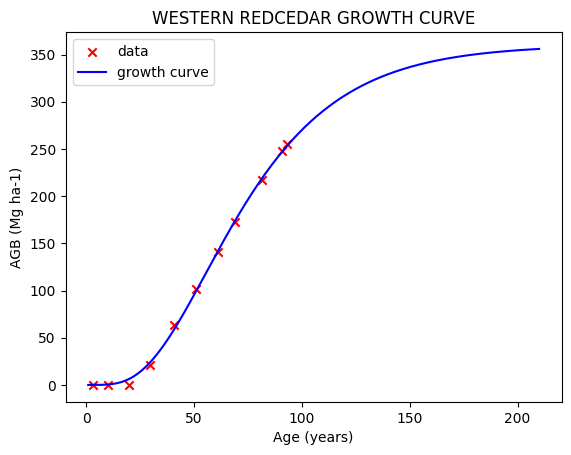

Parameters: [3.60323746e+02 2.84960941e-02 4.84109901e+00]


In [33]:
western_redcedar = TreeSpecies('WESTERN REDCEDAR',
                         [3.2725527831094, 10.1823416506717, 20.0287907869481, 29.7024952015355, 40.9309021113243, 51.1228406909788, 60.9692898272552, 69.2610364683301, 81.6986564299424, 91.0268714011516, 93.0998080614203],
                         [0.295634424942883, 0.295634424942883, 0.295634424942883, 21.5687204068738, 63.0064044975374, 101.545223581636, 140.952793933893, 172.685649384557, 216.862595121045, 247.898954297313, 254.885649014824],
                         [360.632855720095, 0.0284468067037396, 4.83046101554209])

### Pacific Maritime Inventory Data

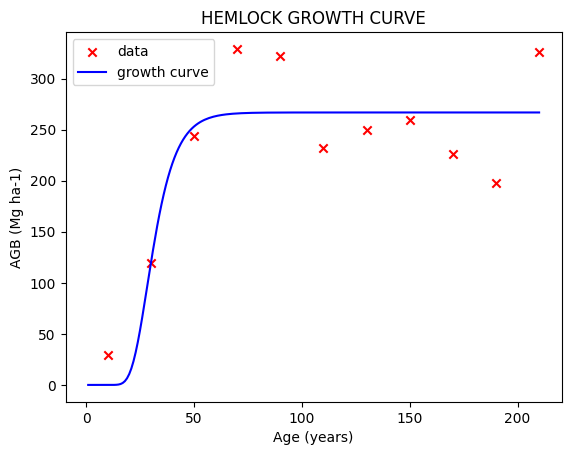

Parameters: [2.66833919e+02 1.35630628e-01 4.70098441e+01]


In [34]:
hemlock = TreeSpecies('HEMLOCK',
                         [10,30,50,70,90,110,130,150,170,190,210],
                         [29.14, 119.32, 243.39, 329.07, 322.25, 231.83, 249.81, 259.46, 226.53, 197.34, 326.38],
                         [266.832207252662, 0.135649004115544, 47.0359862104518])

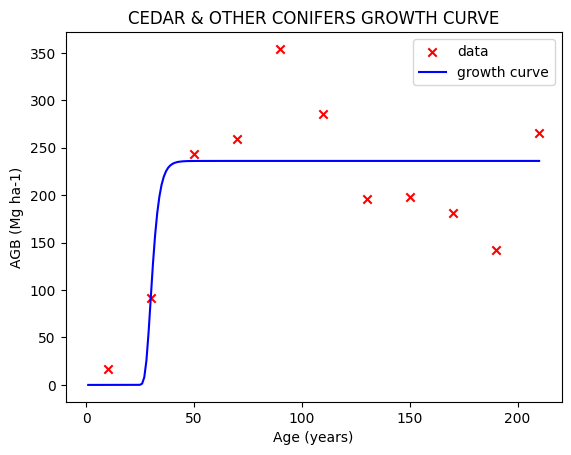

Parameters: [2.36073501e+02 4.24209789e-01 3.17749539e+05]


In [35]:
cedar_conifers = TreeSpecies('CEDAR & OTHER CONIFERS',
                         [10,30,50,70,90,110,130,150,170,190,210],
                         [16.66, 91.81, 243.79, 258.67, 354.12, 285.51, 196, 198.16, 180.71, 142.52, 265.14],
                         [236.091242357912, 0.333343626361766, 17751.0235934541])

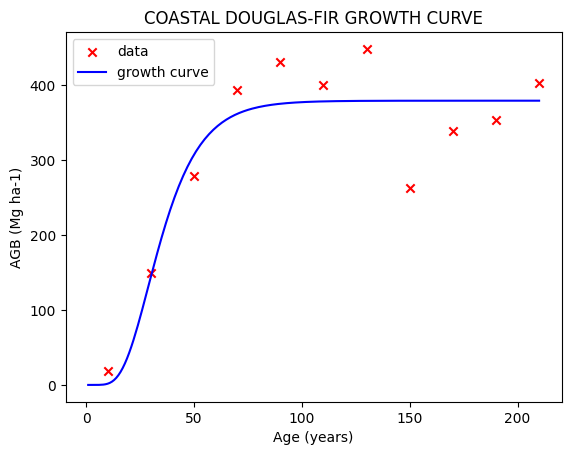

Parameters: [3.78949452e+02 7.39687620e-02 8.43142633e+00]


In [36]:
coast_douglas = TreeSpecies('COASTAL DOUGLAS-FIR',
                         [10,30,50,70,90,110,130,150,170,190,210],
                         [19.18, 149.68, 278.83, 393.34, 431.07, 399.65, 447.97, 263.17, 339.13, 353.77, 402.94],
                         [379.034604967986, 0.0737257060569323, 8.35388453276221])

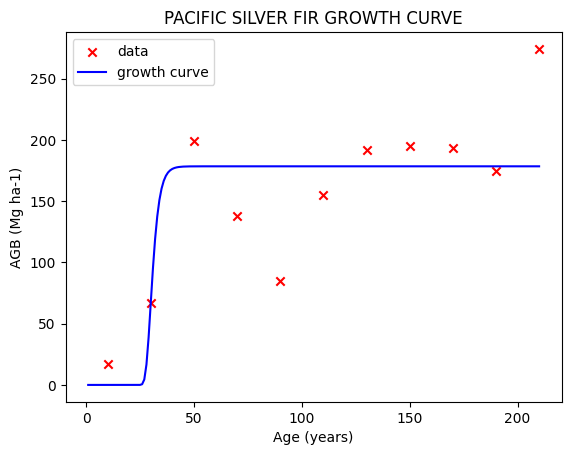

Parameters: [1.78405845e+02 4.41597711e-01 5.56131174e+05]


In [37]:
pac_silver_fir = TreeSpecies('PACIFIC SILVER FIR',
                         [10,30,50,70,90,110,130,150,170,190,210],
                         [17.03, 66.89, 198.79, 137.92, 84.68, 155.24, 191.38, 195.36, 193.48, 174.57, 274.21],
                         [178.096877858935, 0.264712577129793, 2697.01674471176])

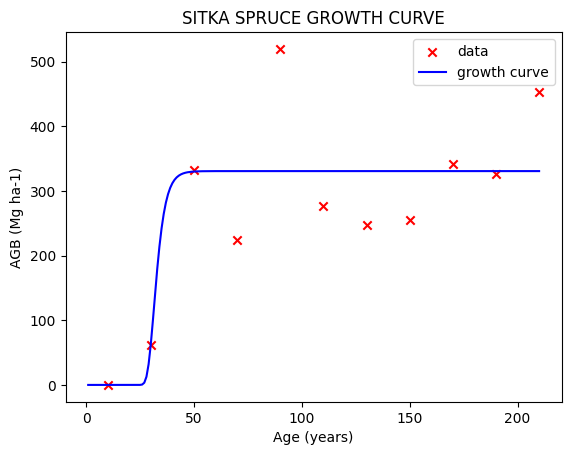

Parameters: [3.30606795e+02 3.35112575e-01 3.87938574e+04]


In [38]:
sitka_spruce = TreeSpecies('SITKA SPRUCE',
                         [10,30,50,70,90,110,130,150,170,190,210],
                         [0, 62.23, 331.7, 224.09, 519.52, 276.27, 247.52, 255.02, 341.27, 326.62, 452.78],
                         [330.911995874043, 0.252169068395704, 3193.38379126733])

### Washington Inventory Data

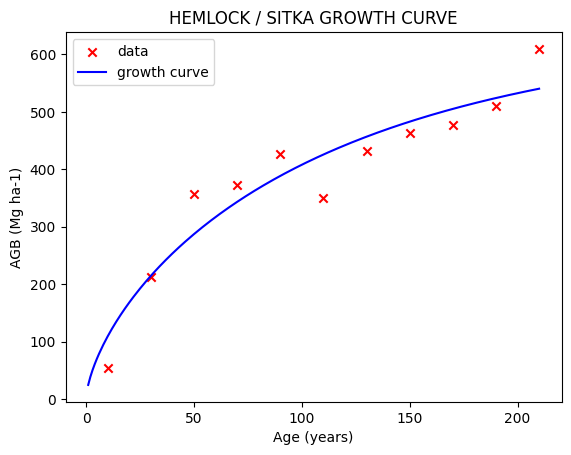

Parameters: [6.43583886e+02 6.91879220e-03 6.56862589e-01]


In [39]:
hemlock_sitka = TreeSpecies('HEMLOCK / SITKA',
                         [10,30,50,70,90,110,130,150,170,190,210],
                         [53.13, 212.31, 356.77, 372.36, 426.18, 349.51, 431.36, 462.95, 476.42, 509.58, 609.54],
                         [643.73439387002, 0.00691104740149755, 0.656599983441623])

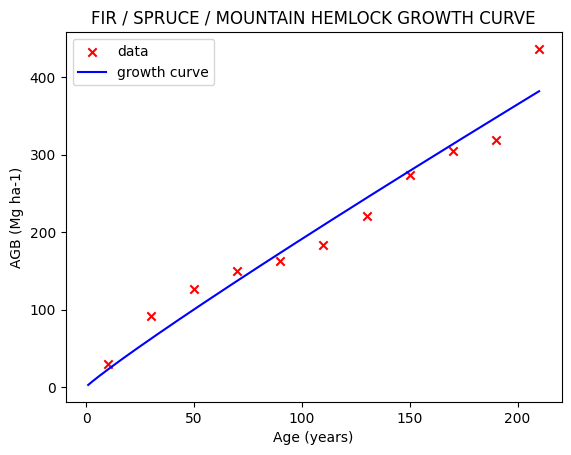

Parameters: [7.52519540e+05 1.41314124e-06 9.33897561e-01]


In [40]:
fir_spruce_mthemlock = TreeSpecies('FIR / SPRUCE / MOUNTAIN HEMLOCK',
                         [10,30,50,70,90,110,130,150,170,190,210],
                         [29.15, 91.46, 126.46, 149.94, 162.66, 183.78, 220.71, 273.65, 304.81, 318.41, 436.59],
                         [274869.928641769, 4.13964821568317E-06, 0.933425930916292])

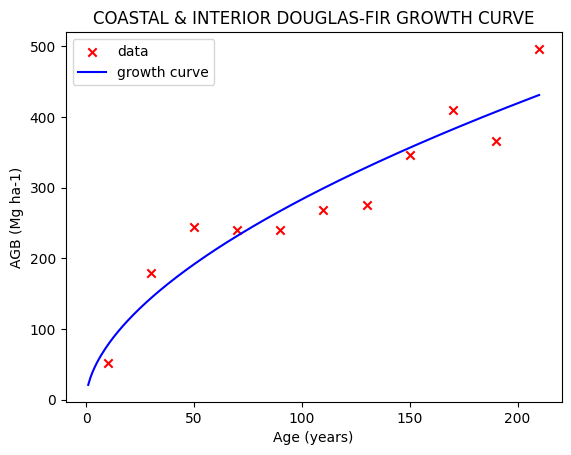

Parameters: [3.51106539e+04 1.98378416e-06 5.65316043e-01]


In [41]:
coast_int_douglas = TreeSpecies('COASTAL & INTERIOR DOUGLAS-FIR',
                         [10,30,50,70,90,110,130,150,170,190,210],
                         [52.34, 179.87, 243.72, 240.58, 239.97, 268.77, 275.11, 346.75, 410.24, 365.98, 496.13],
                         [9215.46768485293, 0.0000212284925046361, 0.565657070848123])